### Text Generation using Markov Chain
- **It is capable of generating new text given the past sequence/data**
    - Simple and effective way of generating new text
        - Text
        - Lyrics
        - Story/Novel
        - Code as well
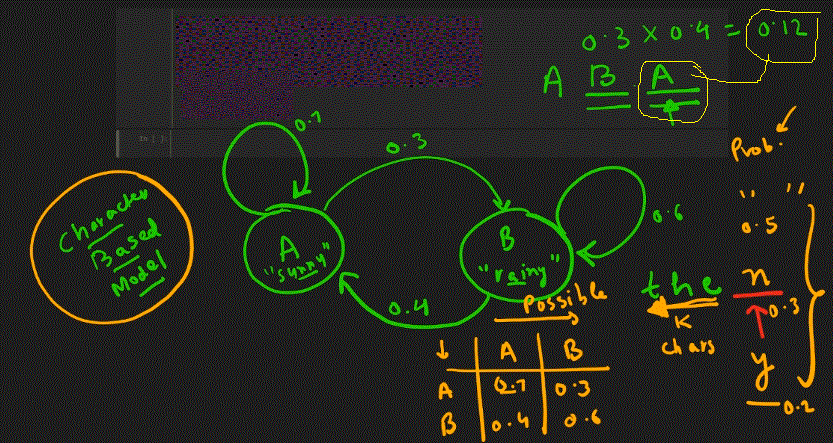

In [17]:
def generateTable(data, k = 4):
    T = {}
    for i in range(len(data) - k):
        X = data[i:i+k]
        Y = data[i+k]
        #print("X '%s'    and    Y '%s' "%(X,Y))
        if T.get(X) is None:
            T[X] = {}
            T[X][Y] = 1
        else:
            if T[X].get(Y) is None:
                T[X][Y] = 1
            else:
                T[X][Y] += 1
                       
    return T

In [58]:
# find probability for 4th char in 'Hell_' as
# {'hell': {'o': 2, 'i': 1}, := o/2+1 = 2/3 i.e (0.66%) and i/2+1 = 1/3 i.e (0.34 %)
def freqToProbability(T):
    for kx in T.keys():
        s = float(sum(T[kx].values()))
        for k in T[kx].keys():
            T[kx][k] = T[kx][k]/s
            
    return T

In [59]:
T = freqToProbability(T)
print(T)

{'hell': {'o': 0.6666666666666666, 'i': 0.3333333333333333}, 'ello': {' ': 1.0}, 'llo ': {'h': 1.0}, 'lo h': {'e': 1.0}, 'o he': {'l': 1.0}, ' hel': {'l': 1.0}}


In [60]:
t = 'hello'
print(t[-1:])

o


In [61]:
text_path = 'modiji_speech.txt'

In [62]:
def load_text(filename):
    with open(filename, encoding ='utf8') as f:
        return f.read().lower()
    
text = load_text(text_path)

In [63]:
print(text)

my dear countrymen,

many of you wish many-many good wishes of the holy festival of independence.

today the country is full of confidence. the country is crossing the new heights by plowing the resolve of dreams with hard work. today's sunrise has brought a new consciousness, new excitement, new excitement, new energy.

our lovely countrymen, once in 12 years, flowers of nilakurinya grow in our country. this year, on the hills of nilgiris in the south, it is like our nilkurinji flower like the ashok chakra of the tricolor flag, in the festival of freedom of the country.

my dear countrymen, we are celebrating this festival of independence, when our daughters uttarakhand, himachal, manipur, telangana, andhra pradesh - our daughters of these states crossed seven seas and coloring the seven seas with a color of tricolor came back

my dear countrymen, we are celebrating the festival of independence at that time, when everest triumphs were so many, many of our heroes, many of our daughters

## Train Markov Chain

In [64]:
def trainMarkovChain(text, k = 4):
    T = generateTable(text, k)
    T = freqToProbability(T)
    
    return T

In [65]:
model = trainMarkovChain(text)
print(model)

{'my d': {'e': 1.0}, 'y de': {'a': 0.8333333333333334, 'v': 0.16666666666666666}, ' dea': {'r': 1.0}, 'dear': {' ': 1.0}, 'ear ': {'c': 1.0}, 'ar c': {'o': 1.0}, 'r co': {'u': 1.0}, ' cou': {'n': 1.0}, 'coun': {'t': 1.0}, 'ount': {'r': 1.0}, 'untr': {'y': 1.0}, 'ntry': {'m': 0.3181818181818182, ' ': 0.2727272727272727, '.': 0.13636363636363635, ',': 0.18181818181818182, "'": 0.09090909090909091}, 'trym': {'e': 1.0}, 'ryme': {'n': 1.0}, 'ymen': {',': 0.8571428571428571, ' ': 0.14285714285714285}, 'men,': {'\n': 0.14285714285714285, ' ': 0.8571428571428571}, 'en,\n': {'\n': 1.0}, 'n,\n\n': {'m': 1.0}, ',\n\nm': {'a': 1.0}, '\n\nma': {'n': 1.0}, '\nman': {'y': 1.0}, 'many': {' ': 0.7142857142857143, '-': 0.14285714285714285, ',': 0.14285714285714285}, 'any ': {'o': 0.5, 'g': 0.16666666666666666, 'c': 0.16666666666666666, 'r': 0.16666666666666666}, 'ny o': {'f': 1.0}, 'y of': {' ': 1.0}, ' of ': {'y': 0.02040816326530612, 't': 0.4489795918367347, 'i': 0.12244897959183673, 'c': 0.0204081632

### Generate Text at Text Time!
- Lets say a character has probability of 'o' is .666  and 'i' .9999
- which one will you choose ? its done using **Sampling**

In [66]:
# Sampling
import numpy as np
f = ['alpha', 'beta', 'gamma']
probability = [0.8, 0.0, 0.2]
for i in range(10):
    print(np.random.choice(f,p = probability))

alpha
alpha
alpha
alpha
alpha
alpha
gamma
alpha
alpha
alpha


In [77]:
def sample_text(word, T, k):
    word = word[-k:]
  #  print(word)
    if T.get(word) is None:
        return ' '
    possibleChar = list(T[word].keys())
    possibleValues = list(T[word].values())
    
#     print(possibleChar)
#     print(possibleValues)
    return np.random.choice(possibleChar,p =possibleValues)

In [78]:
sample_text('comm', model, 4)

'o'

In [84]:
def generateText(starting_sentence, k = 4, maxLen = 1000):
    sentence = starting_sentence
    ctx = starting_sentence[-k:]
    
    for ix in range(maxLen):
        next_prediction = sample_text(ctx, model, k)
        sentence += next_prediction
        ctx = sentence[-k:]
        
    return sentence

In [86]:
text = generateText('dear', k = 4, maxLen = 200)
print(text)

dear countrymen today andhra pradesh - our lovely countrymen,

many, millions of the series who have suffered for years of the eternal glory of the countrymen, we are country and nights.

today.

my dear 
